# Machine Learning Foundation

## Section 1, Part e: Hypothesis Testing 


## Objectives: 

After this discussion, you should be able to: 
* Know the difference between a null and alternative hypothesis
* Write your own set of hypotheses for testing


In [1]:
# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
import math

Populating the interactive namespace from numpy and matplotlib


## Null Hypothesis

I claim that I can use mystical abilities to predict the outcome of coin flips.

You don't think I can.

How can we test it?

We do an experiment in which I call 100 coin flips. I get 57 right.

Am I special or not?


--- 

### Determining the Null and Alternative Hypothesis

Write the null and alternative hypotheses!

Null: 

Alternative:

---


**Null:** I'm not special; my true rate of flip prediction is 0.5. 

But even under this hypothesis, I could get 57 out of 100 right. So did I get lucky (by random chance) or am I mystical?

**Alternative:** My true rate of flip prediction is greater than 0.5.

The thing we're measuring from the experiment, or **test statistic**, is the number of correct flip predictions out of 100.


---

If the null hypothesis is correct, the test statistic is binomial distributed with parameters `n = 100` and `p = 0.5`. That is, if we repeated the whole experiment many times, we would see such a distribution for all the results.

So if the null hypothesis is correct, how likely is it that I got 57 or more coin flips correct?

Before we check (really, before we do the experiment) we decide what would convince us that I have ESP. The choice of a cutoff at 5% probability is common. That is, if we would only see data as extreme as we've seen less than 5% of the time, we'll say that seems too unlikely and we will conclude that we don't think the null hypothesis is true.

---

We have two outcomes, one with probability (p) and the other with probability (1-p) of happening (remember the axioms of probability?), so we know the [binomial](https://en.wikipedia.org/wiki/Binomial_distribution?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) [distribution](http://mathworld.wolfram.com/BinomialDistribution.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) is the [right tool for this analysis](https://homepage.divms.uiowa.edu/~mbognar/applets/bin.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).

In the case of the binomial distribution, which is discrete and not too complicated mathematically, we could just work out the probability. But in general we'll rely on some existing functionality. (In a traditional statistics class, this is the part where we'd turn to a table in the back of the book.)


In [3]:
from scipy.stats import binom
prob = 1 - binom.cdf(k=56, n=100, p=0.5)
print(prob)
print(str(round(prob*100, 1))+"%")

# p = probability of success for a single trial
# n = number of trials 
# k = number of successes you're evaluating

0.09667395224782127
9.7%


The probability of getting 57 or more correct is about 9.7%. This is more than 5%, so we can't reject the null and conclude that I (probably) don't have mystical powers.

---

Conversely, we can figure out what the 95% cutoff is beforehand.

--- 

### Exercise

Find the number of coin flips a person would need to guess correctly for us to believe they're clairvoyant.

---


In [13]:
from scipy.stats import binom
print(binom.ppf(q=0.95,n=100, p=0.5)+1) # P(x>59) + 1

# ppf = percent point function (inverse of cdf)
# q = cumulative probability
# n = number of trials
# p = probability of success

58.0


Which means, one should get 59 tosses or more to be considered clairvoyant. And we will say the person has predictive power with a confidence level of 95%.

---


## A More Specific Claim

So far so good. What if instead I said, "I'm not perfect, but I can predict coin tosses 60% of the time. Which is still good, which is still valuable."

What do we do in this case? Sure, we can do exactly what we did earlier and when I predict 57 times, we can reject my claim.

But what if I say, "Wait a minute. I said 60 and I got 57, that sounds pretty good to me."

Interpretation:
> "I happened to have a poor guessing day, and that's why my results aren't quite statistically significant!"

What do we say to that? The issue here is that there is no longer a single null hypothesis that we prove or disprove. Instead, **we have two competing hypotheses**:
    * Hypothesis A: There is no predictive power
    * Hypothesis B: There is a 60% predictive power

Each is a normal curve, with one centered at 50% and the other at 60%.


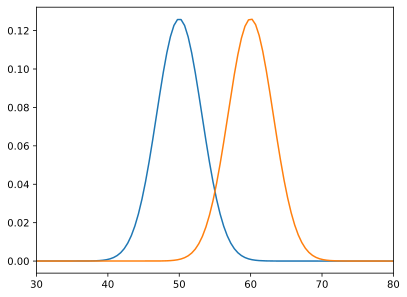

In [16]:
x = np.linspace(1, 100, 200)
variance = 10
sigma = math.sqrt(variance) # standard deviation

mu1, mu2 = 50, 60  # mean values
# mu1 = 50; center of the 1st normal distribution
# mu2 = 60; center of the 2nd normal distribution

norm1, norm2 = stats.norm.pdf(x=x, loc=mu1, scale=sigma), stats.norm.pdf(x=x, loc=mu2, scale=sigma)

plt.plot(x, norm1)
plt.plot(x, norm2)

plt.xlim(30,80)
plt.show()

**And 57 correct guesses falls within the 95% confidence of both the curves:**


In [17]:
print (1 - binom.cdf(k=57, n=100, p=0.5))
print (binom.cdf(k=57, n=100, p=0.6))

0.06660530960360689
0.3032601298434462


What now? There just isn't enough data to achieve a confidence of 95%. There are few things we can do.


### 1) Decrease confidence


Since we have a claim at 50 and 60, we can pick the mid-point, which is 55. We can say if I can predict over 55, then I have predictive power. This would mean that we have decreased our confidence level.


**confident interval** ဆိုတာ population တစ်ခုလုံးရဲ့ mean ကိုမသိနိုင်လို့ sample round တစ်ခုချင်းစီမှာရှိတဲ့ mean value တွေနဲ့တွက်ထုတ်ထားတဲ့ interval တစ်ခုဖြစ်တယ်။ အဲ့ဒီအထဲမှာ population ရဲ့ **true mean** လဲပါနေလိမ့်မယ်။


In [19]:
print (1 - binom.cdf(k=55, n=100, p=0.5)) # 1 - P(X<=55) = P(X>55)
print (binom.cdf(k=54, n=100, p=0.6))     # P(X<=54)

0.13562651203691767
0.1310904526197478


** At an 87% percent confidence level, we can say that I have some predictive power, since I got 57 tosses correct.**

Not ideal; we picked a number, which is prone to bias, rather than a confidence interval.


### 2) Be biased

But it is not neccessary that we bias the two hypotheses equally and pick the midpoint the way we did. The cut-off point can be anywhere. Currently, our error margins are even. The chance that someone has predictive power and we say no is 13% and the chance that someone has no power and we say they do is also 13%. As we change the cutoff, one error goes down and the other goes way up.

For example, if we stuck with the original 95% on a coin being fair:


In [6]:
binom.ppf(0.95, 100, 0.5) # this is the inverse of the cdf functions above

58.0

Then our cut-off is 58. Our two errors will be:


In [21]:
print (1 - binom.cdf(58, 100, 0.5))  # 1 - P(X<=58) = P(X>58)
print (binom.cdf(58, 100, 0.6))      # P(X<=58)

0.04431304005703385
0.3774673238778292


5% chance someone has no power and we say they do. But a 38% chance someone has predictive power and we say no. Which depending on the problem might be exactly what we want. These two types of errors are called Type I and Type II. And we have the choice of biasing against one or the other. 


### 3) Increase sample size

The best scenario though is to increase the sample size. Imagine what happens we did 1000 tosses instead of 100.


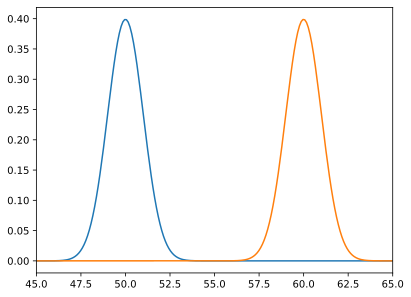

In [25]:
variance = 1
sigma = math.sqrt(variance) # standard deviation
x = np.linspace(1,100,1000)

mu1, mu2 = 50, 60           # mean values

norm1 = stats.norm.pdf(x, mu1, sigma) # PDF of a normal distribution
norm2 = stats.norm.pdf(x, mu2, sigma)

plt.plot(x, norm1); plt.plot(x, norm2)

plt.xlim(45, 65)
plt.show()

The two normal curves are completely seperated now.


In [26]:
print (binom.ppf(0.95,1000,0.5))
print (binom.ppf(0.05,1000,0.6))

526.0
574.0


---

### Exercise

What are our errors now?

---


In [27]:
print (1 - binom.cdf(550, 1000, 0.5)) # 1 - P(X<=550) = P(X>550) at 50% probability of success
print (binom.cdf(550, 1000, 0.6))     # P(X>550) at 60% probability of success

0.0006958707972110068
0.0007412028990060172


**With a cutoff of 550, both our errors come down to under 0.1%.**


---
### Machine Learning Foundation (C) 2020 IBM Corporation
